# Name:Krisha Zaveri
# Task: To predict the percentage of a student based on the number of study hours using supervised Machine Learning.

In statistics, Linear Regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. Here we will go through Simple Linear Regression. Simple Linear Regression is of the form y=wx+b where y is the dependent variable and w and b are the training parameters which are to be optimized during training process to get accurate predictions.

# Step 1: Importing the libraries
Here we import the numpy library to help in calculations, the pandas library to store the data in a pandas dataframe and the matplotlib is used to plot graphs.

In [2]:
#Importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Importing the dataset
We download the dataset from a github repositary which contains the data as hours vs scores. The variable x will store the hours and variable y will store the scores. The dataset.head(25) is used to show the data.

In [5]:
url=r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
dataset=pd.read_csv(url)
x=dataset.iloc[:, :-1].values #gives until the last column
y=dataset.iloc[:, -1].values #gives the last column
print("Data Imported")
dataset.head(25)

Data Imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Step 3-Visualizing the data
We plot the given data to see if a relationship exists between the two variables- hours of study and scores.

<function matplotlib.pyplot.show(*args, **kw)>

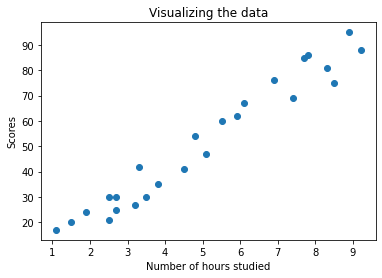

In [7]:
plt.scatter(x,y)
plt.title("Visualizing the data")
plt.xlabel("Number of hours studied")
plt.ylabel("Scores")

plt.show

There appears to be a positive linear relationship between between number of hours studied and the scores, but the relationship is not perfect. The plot exhibits some trend but it also exhibits some scatter. Therefore, it is a statistical relationship, not a deterministic one.

# Step 4: Splitting the dataset into train and test data using train_test_split 
In this step we have to split the dataset into the training set on which the linear regression model will be trained and the test set on which the linear regression model will be applied to visualize the results. Here the 'test_size=0.2' indicates that 20% of the data will be kept as the test set and the remaining as the training set. Splitting of the dataset accomplishes unbiased evaluation. This means that you can’t evaluate the predictive performance of a model with the same data you used for training. You need evaluate the model with fresh data that hasn’t been seen by the model before. 

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=0)

# Step 5:Fitting linear regression model into the training set

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() #the linear regression function is assigned to the variable regressor.
regressor.fit(x_train,y_train) #the regressor.fit function is fitted with x_train and y_train on which the model will be trained

LinearRegression()

# Step 6: Regression line

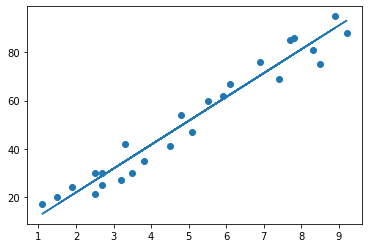

In [11]:
line=regressor.coef_*x + regressor.intercept_
#Plotting the test data and regression line
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

# Step 7: Predicting values
the regressor.predict function is used to predict the values for the Test set 

In [12]:
print(x_test)
Y=regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Step 8:Comparing actual values to our predicted values

In [13]:
data=pd.DataFrame({"Actual":y_test, "Predicted":Y})
print(data)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


# Step 9: Visualizing the training and test set

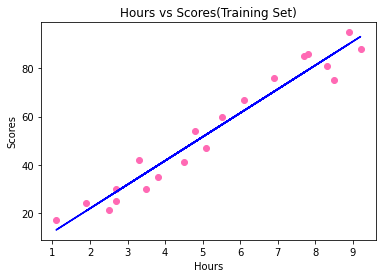

In [14]:
#Plotting the training set
plt.scatter(x_train,y_train, color = 'hotpink')
plt.plot(x_train,regressor.predict(x_train), color='blue')
plt.title("Hours vs Scores(Training Set)")
plt.xlabel("Hours") # adding the name of x-axis
plt.ylabel("Scores") # adding the name of y-axis
plt.show() 

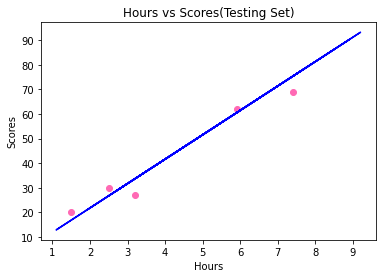

In [15]:
#Plotting the test set
plt.scatter(x_test,y_test, c='hotpink')
plt.plot(x_train,regressor.predict(x_train), color='blue')
plt.title("Hours vs Scores(Testing Set)")
plt.xlabel("Hours") # adding the name of x-axis
plt.ylabel("Scores") # adding the name of y-axis
plt.show() 

# Problem statement: What will be predicted score if a student studies for 9.25 hrs/ day?

In [16]:
hours=9.25
pred = regressor.predict([[hours]])
print("Predicted score when student studies 9.25 hours/day:{}".format(pred[0]))

Predicted score when student studies 9.25 hours/day:93.69173248737538


In [17]:
from sklearn import metrics
print("Mean absolute error:",metrics.mean_absolute_error(y_test,Y))

Mean absolute error: 4.183859899002975
